# Clustering

## Learning Goals

Be able to discuss and discover use cases for clustering across multiple industries.

Be able to recognize common clustering algorithms.

General understanding of how the k-means clustering algorithm works.

Ability to implement k-means clustering in python.

Handle outliers using IQR.

More practice scaling data.

Strategies for missing values.

Plotting clusters.

Ability to make use of discovered clusters later down the data science pipeline.

Only include properties with a transaction in 2017

Include only the last transaction for each property (so no duplicate property ID's)

Zestimate error and date of transaction

(Hint: read the docs for the .duplicated method)

Only include properties that have a latitude and longitude value

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import wrangle_zillow as wz
import wrangle_mall as wm

### Acquire & Summarize

In [2]:
df = wz.get_zillow()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,parcelid,logerror,transactiondate
0,0,10754147,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,...,"2,016.00",9.00,NaN,None,NaN,NaN,0,14297519,0.03,2017-01-01
1,1,10759547,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,...,"2,015.00","27,516.00",NaN,None,NaN,NaN,1,17052889,0.06,2017-01-01
2,2,10843547,NaN,NaN,NaN,0.00,0.00,5.00,NaN,NaN,...,"2,016.00","774,261.00","20,800.37",None,NaN,NaN,2,14186244,0.01,2017-01-01
3,3,10859147,NaN,NaN,NaN,0.00,0.00,3.00,6.00,NaN,...,"2,016.00","594,416.00","14,557.57",None,NaN,NaN,3,12177905,-0.10,2017-01-01
4,4,10879947,NaN,NaN,NaN,0.00,0.00,4.00,NaN,NaN,...,"2,016.00","243,350.00","5,725.17",None,NaN,NaN,4,10887214,0.01,2017-01-01


Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"77,414.00","38,848.45","22,404.20",0.00,"19,459.25","38,871.50","58,254.75","77,613.00"
parcelid,"77,414.00","13,376,693.03","8,324,811.48","10,711,745.00","11,585,951.50","12,532,801.50","14,115,193.50","169,601,949.00"
airconditioningtypeid,"21,395.00",1.93,3.13,1.00,1.00,1.00,1.00,13.00
architecturalstyletypeid,151.00,7.43,2.63,2.00,7.00,7.00,7.00,21.00
basementsqft,44.00,601.61,462.68,63.00,222.00,542.00,744.50,"2,443.00"
bathroomcnt,"77,414.00",2.21,1.08,0.00,2.00,2.00,3.00,20.00
bedroomcnt,"77,414.00",3.08,1.28,0.00,2.00,3.00,4.00,25.00
buildingclasstypeid,381.00,3.77,0.46,1.00,4.00,4.00,4.00,5.00
buildingqualitytypeid,"50,182.00",6.30,1.73,1.00,5.00,6.00,8.00,12.00
calculatedbathnbr,"74,202.00",2.31,1.00,1.00,2.00,2.00,3.00,20.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77414 non-null  int64  
 1   parcelid                      77414 non-null  int64  
 2   airconditioningtypeid         21395 non-null  float64
 3   architecturalstyletypeid      151 non-null    float64
 4   basementsqft                  44 non-null     float64
 5   bathroomcnt                   77414 non-null  float64
 6   bedroomcnt                    77414 non-null  float64
 7   buildingclasstypeid           381 non-null    float64
 8   buildingqualitytypeid         50182 non-null  float64
 9   calculatedbathnbr             74202 non-null  float64
 10  decktypeid                    510 non-null    float64
 11  finishedfloor1squarefeet      5953 non-null   float64
 12  calculatedfinishedsquarefeet  76306 non-null  float64
 13  f

In [5]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
censustractandblock         float64
id                            int64
parcelid                      int64
logerror                    float64
transactiondate              object
Length: 63, dtype: object

In [6]:
df.shape

(77414, 63)

In [7]:
df_row = wz.missing_rows(df)
df_row.head()

,number_rows_miss,pct_rows_miss
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,56019,0.72
architecturalstyletypeid,77263,1.00
basementsqft,77370,1.00


In [8]:
cols_not_miss = df_row[df_row.number_rows_miss == 0].T.columns.to_list()
cols_not_miss

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'fips',
 'latitude',
 'longitude',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcounty',
 'assessmentyear',
 'id',
 'parcelid',
 'logerror',
 'transactiondate']

In [9]:
cols_50pct_miss = df_row[df_row.pct_rows_miss > 0.5].T.columns.to_list()
cols_50pct_miss

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

In [10]:
df_cols = wz.missing_cols(df)
df_cols.head()

,number_cols_miss,pct_cols_miss
0,41,0.65
1,40,0.63
2,32,0.51
3,31,0.49
4,31,0.49


In [11]:
df.isna().sum(axis=1).value_counts().sort_values()

19        1
44        3
20        8
43       38
21       50
36       63
35       71
42       92
37      120
38      123
41      210
22      235
34      306
33      339
23      435
39      449
24      557
40      996
32     1536
31     2948
25     4777
30     6470
26     7159
27    11352
29    18500
28    20576
dtype: int64

In [12]:
df.isna().sum(axis=1).value_counts().index

Int64Index([28, 29, 27, 26, 30, 25, 31, 32, 40, 24, 39, 23, 33, 34, 22, 41, 38,
            37, 42, 35, 36, 21, 43, 20, 44, 19],
           dtype='int64')

### Takeaways

Remove any properties that are likely to be something other than single unit properties.
(e.g. no duplexes, no land/lot, ...). 

There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [13]:
df['propertylandusetypeid'].value_counts().sort_values()

270.00        1
264.00        9
275.00       35
267.00       48
260.00      103
 47.00      143
 31.00      271
265.00      287
248.00      979
247.00     1020
269.00     1604
263.00     1676
246.00     2846
266.00    12458
261.00    55934
Name: propertylandusetypeid, dtype: int64

In [14]:
prop = pd.Series([260, 261, 263, 273, 275, 276, 279])
df_single = df[(df.propertylandusetypeid).isin(prop)]
df_single.shape

(57748, 63)

Create a function that will drop rows or columns based on the percent of values that are missing: 

handle_missing_values(df, prop_required_column, prop_required_row)

The input: A dataframe

A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).

A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

The output: The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [15]:
df2 = wz.handle_missing_values(df_single, .85, .75)
df2.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,parcelid,logerror,transactiondate
1,1,10759547,0.00,0.00,NaN,NaN,NaN,"6,037.00",NaN,"34,140,430.00",...,NaN,"27,516.00","2,015.00","27,516.00",NaN,NaN,1,17052889,0.06,2017-01-01
6,6,10933547,0.00,0.00,NaN,NaN,NaN,"6,037.00",NaN,"34,131,929.00",...,"404,013.00","563,029.00","2,016.00","159,016.00","6,773.34",NaN,6,12095076,-0.00,2017-01-01
15,15,11193347,0.00,0.00,NaN,NaN,NaN,"6,037.00",NaN,"34,585,014.00",...,NaN,10.00,"2,016.00",10.00,NaN,NaN,15,17110996,0.01,2017-01-02
16,16,11215747,0.00,0.00,NaN,NaN,NaN,"6,037.00",NaN,"34,563,376.00",...,NaN,10.00,"2,016.00",10.00,NaN,NaN,16,14375300,-0.02,2017-01-02
17,17,11229347,0.00,0.00,NaN,NaN,NaN,"6,037.00",NaN,"34,526,913.00",...,NaN,"2,108.00","2,016.00","2,108.00",174.21,NaN,17,12045625,-0.02,2017-01-02


In [16]:
df2.isna().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr               1928
calculatedfinishedsquarefeet     811
finishedsquarefeet12            1197
fips                               0
fullbathcnt                     1928
latitude                           0
longitude                          0
lotsizesquarefeet               1858
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1062
regionidcounty                     0
regionidzip                       75
roomcnt                            0
yearbuilt                        826
structuretaxvaluedollarcnt      1003
taxvaluedollarcnt                832
assessmentyear                     0
landtaxvaluedollarcnt           1485
taxamount                        333
censustractandblock             1165
id                                 0
p

In [17]:
df3 = df2.dropna()
df3.isna().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
id                              0
parcelid                        0
logerror                        0
transactiondat

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53965 entries, 336 to 77413
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            53965 non-null  int64  
 1   parcelid                      53965 non-null  int64  
 2   bathroomcnt                   53965 non-null  float64
 3   bedroomcnt                    53965 non-null  float64
 4   calculatedbathnbr             53965 non-null  float64
 5   calculatedfinishedsquarefeet  53965 non-null  float64
 6   finishedsquarefeet12          53965 non-null  float64
 7   fips                          53965 non-null  float64
 8   fullbathcnt                   53965 non-null  float64
 9   latitude                      53965 non-null  float64
 10  longitude                     53965 non-null  float64
 11  lotsizesquarefeet             53965 non-null  float64
 12  propertycountylandusecode     53965 non-null  object 
 13 

### Acquire data from the customers table in the mall_customers database.

Summarize the data (include distributions and descriptive statistics).

Detect outliers using IQR.

Split data into train, validate, and test.

Encode categorical columns using a one hot encoder (pd.get_dummies).

Handles missing values.

Scaling

In [19]:
mall_df = wm.get_mall()
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.00,100.50,57.88,1.00,50.75,100.50,150.25,200.00
age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
annual_income,200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
spending_score,200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00


In [21]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
mall_df.shape

(200, 5)

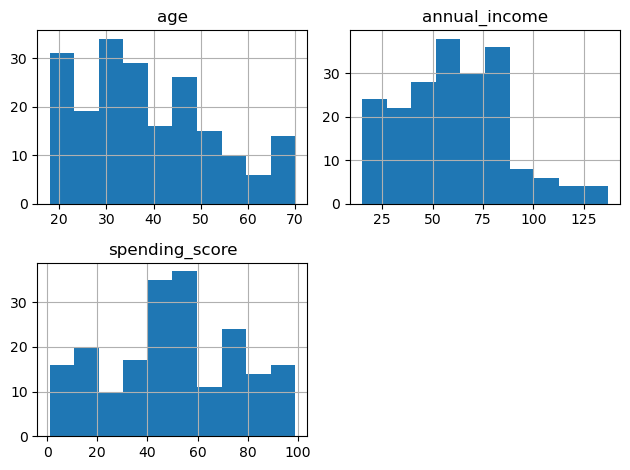

In [23]:
mall_df.drop(columns='customer_id').hist()
plt.tight_layout()

### Detect outliers using IQR.

In [24]:
wm.get_upper_outliers(mall_df.age, 1.5).sum()

0

In [25]:
wm.get_upper_outliers(mall_df.annual_income, 1.5).sum()

8.5

In [26]:
wm.get_upper_outliers(mall_df.spending_score, 1.5).sum()

0

In [27]:
wm.get_lower_outliers(mall_df.age, 1.5).sum()

4185.5

In [28]:
wm.get_lower_outliers(mall_df.annual_income, 1.5).sum()

7407.0

In [29]:
wm.get_lower_outliers(mall_df.spending_score, 1.5).sum()

8416.875

### Split data into train, validate, and test.

In [30]:
wm.mall_split(mall_df)

(     customer_id  gender  age  annual_income  spending_score
 155          156  Female   27             78              89
 146          147    Male   48             77              36
 94            95  Female   32             60              42
 26            27  Female   45             28              32
 82            83    Male   67             54              41
 ..           ...     ...  ...            ...             ...
 78            79  Female   23             54              52
 127          128    Male   40             71              95
 159          160  Female   30             78              73
 112          113  Female   38             64              42
 169          170    Male   32             87              63
 
 [112 rows x 5 columns],
      customer_id  gender  age  annual_income  spending_score
 80            81    Male   57             54              51
 123          124    Male   39             69              91
 59            60    Male   53             

In [31]:
train, validate, test = wm.mall_split(mall_df)

In [32]:
train.nunique()

customer_id       112
gender              2
age                44
annual_income      50
spending_score     63
dtype: int64

### Encode categorical columns using a one hot encoder (pd.get_dummies).

In [33]:
train, validate, test = wm.one_hot_encoder(train, validate, test, ['gender'])
train.head()

,customer_id,gender,age,annual_income,spending_score,Female,Male
155,156,Female,27,78,89,1.00,0.00
146,147,Male,48,77,36,0.00,1.00
94,95,Female,32,60,42,1.00,0.00
26,27,Female,45,28,32,1.00,0.00
82,83,Male,67,54,41,0.00,1.00


### Handles missing values.

In [34]:
train.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
Female            0
Male              0
dtype: int64

In [35]:
validate.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
Female            0
Male              0
dtype: int64

In [36]:
test.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
Female            0
Male              0
dtype: int64

### Scaling

In [37]:
cols_scale = ['age', 'annual_income', 'spending_score', 'Male']
X_train = train[cols_scale]
X_validate = validate[cols_scale]
X_test = test[cols_scale]

In [38]:
X_train_scaled, X_validate_scaled, X_test_scaled = wm.min_max_scale(X_train, X_validate, X_test)
X_train_scaled.head()

,age,annual_income,spending_score,Male
155,0.18,0.57,0.92,0.00
146,0.59,0.56,0.36,1.00
94,0.27,0.41,0.43,0.00
26,0.53,0.12,0.32,0.00
82,0.96,0.35,0.42,1.00
